# Temperature Forecast Project using ML


Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [127]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv(r"C:\Users\HP\Desktop\temperature.csv",engine='python')

In [129]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [130]:
df.shape

(7752, 25)

In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [132]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [133]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

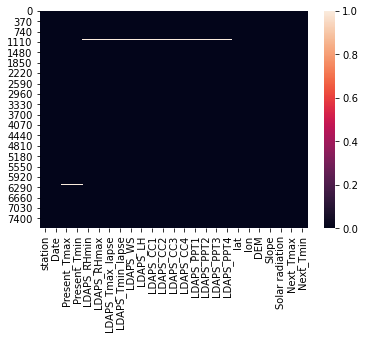

In [134]:
sns.heatmap(df.isna())


In [135]:
df.corr()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


<AxesSubplot:ylabel='Density'>

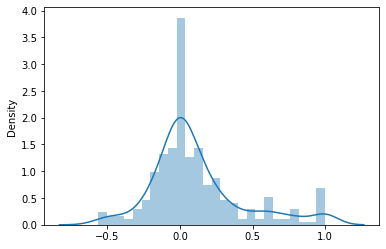

In [136]:
# plotting the correlation
sns.distplot(df.corr())

<AxesSubplot:>

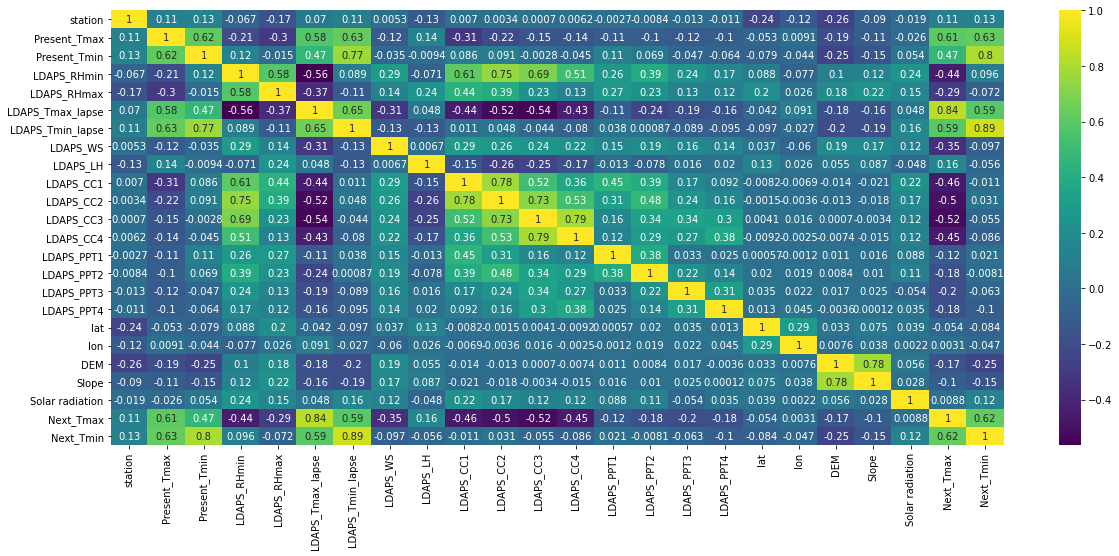

In [137]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

__so overall__

__There are around 7750 samples in this dataset__

__all columns have null values__

__dataset have outliers to get remove and non coordinal values__


# single anaylsis

__latitude and logitudes__


<AxesSubplot:xlabel='lon', ylabel='lat'>

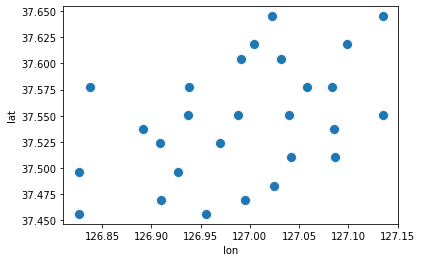

In [138]:
sns.scatterplot(df.lon,df.lat,s=100)


both are equally distributed

__station__

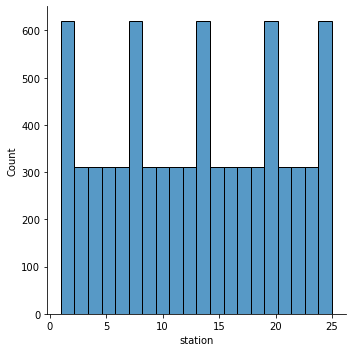

In [139]:
sns.displot(df.station)


__min and max temperature__


<AxesSubplot:>

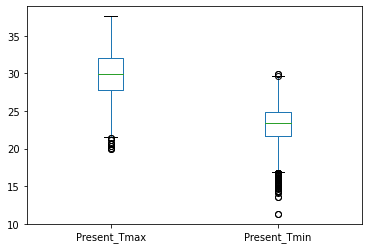

In [140]:
df[['Present_Tmax','Present_Tmin']].plot(kind='box')


lot of outliers in both max and minimum tempertures

In [141]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

looks like maximum arent fill and this all includes 1% of data so lets remove null values

In [142]:
df=df.dropna()

In [143]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [144]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [145]:
df_cleaned = df.copy()


<AxesSubplot:>

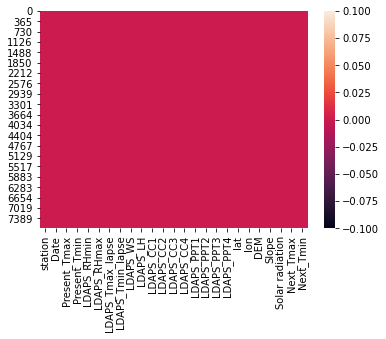

In [146]:
sns.heatmap(df_cleaned.isna())


# outlier removal

In [147]:
def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

<AxesSubplot:>

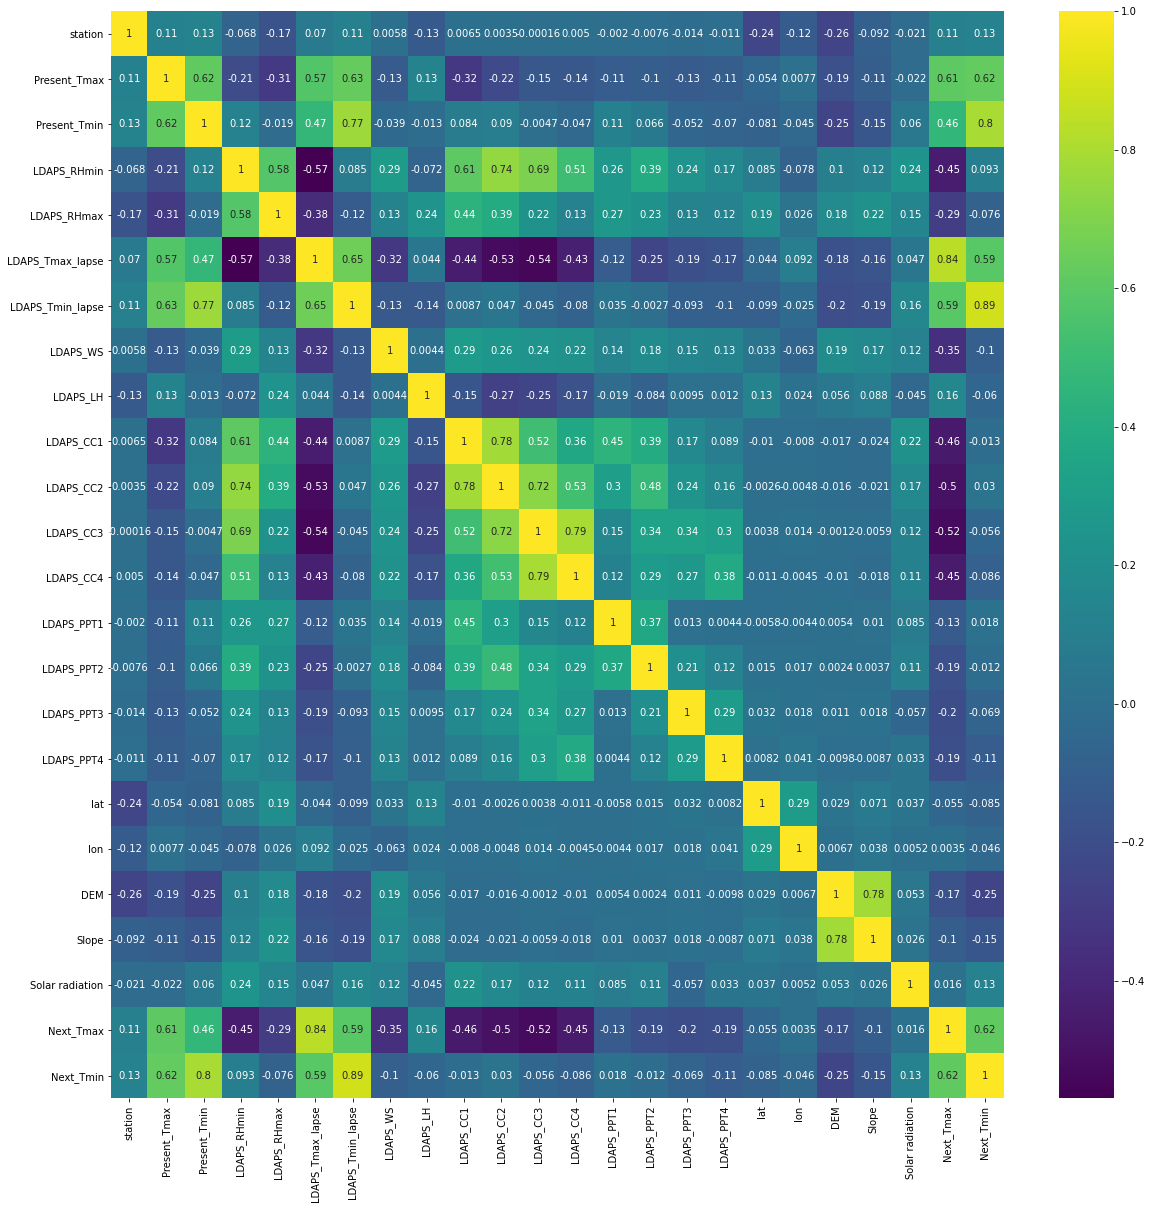

In [148]:
fig_of_size(20,20)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [149]:
num_var = list(df.columns)
num_var.remove('Date')

In [150]:
num_var


['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

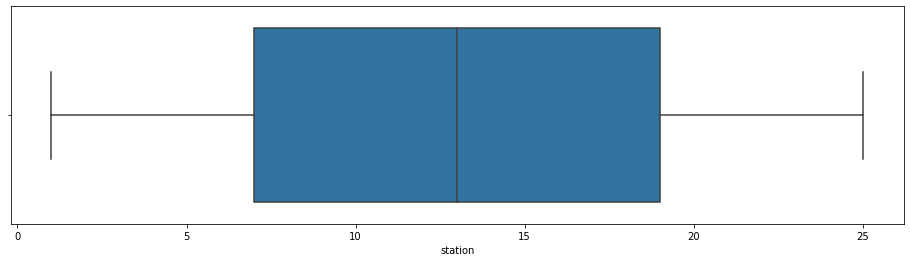

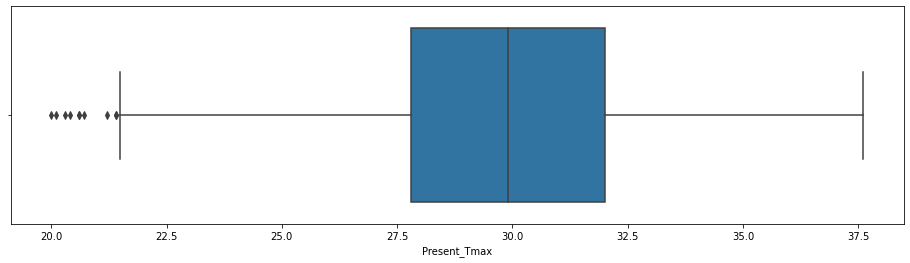

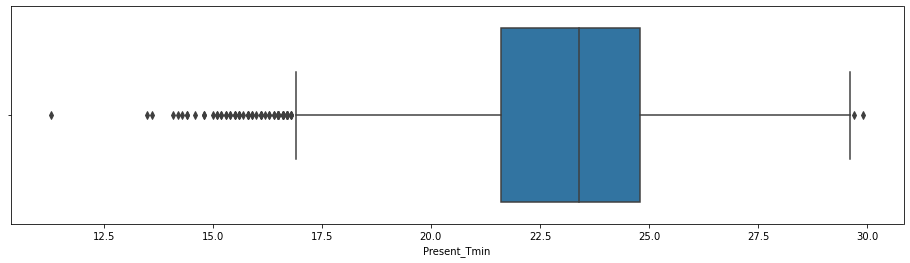

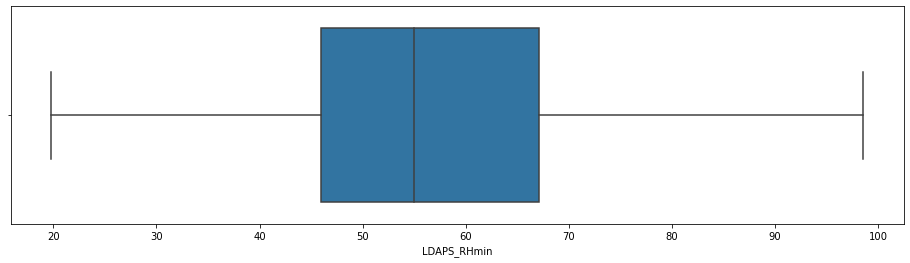

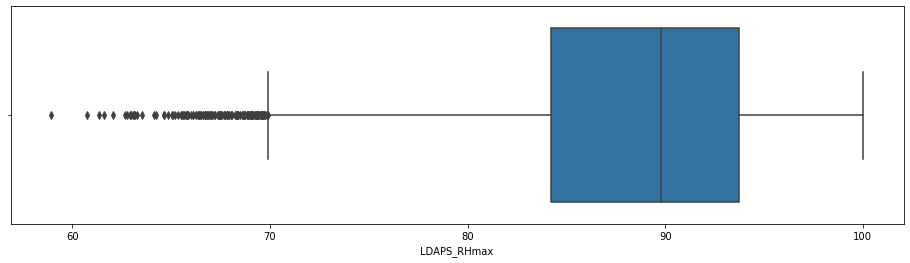

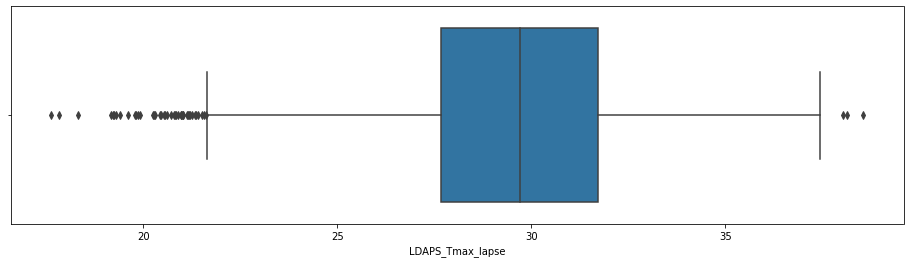

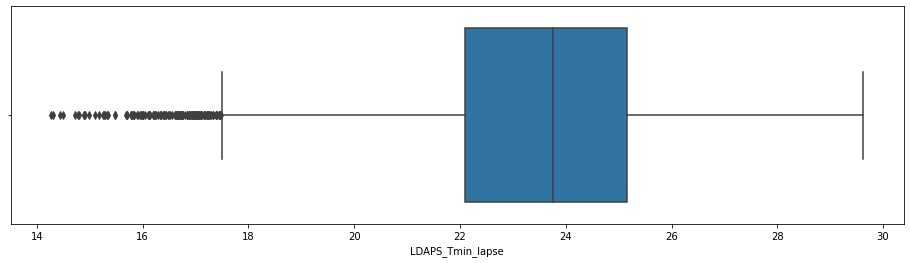

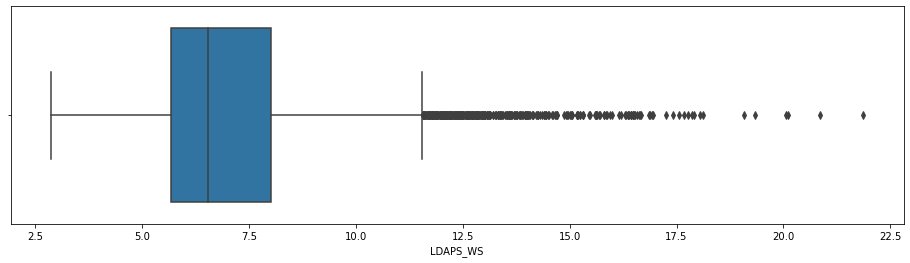

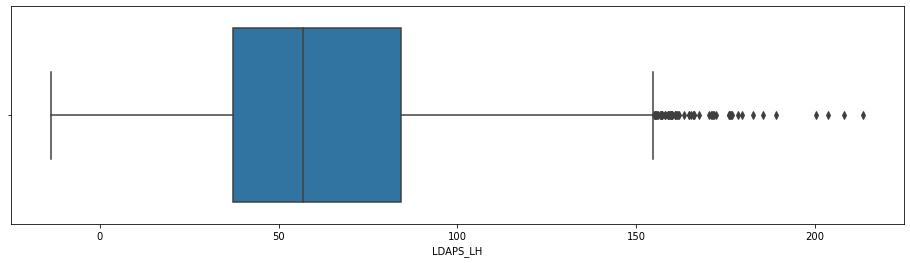

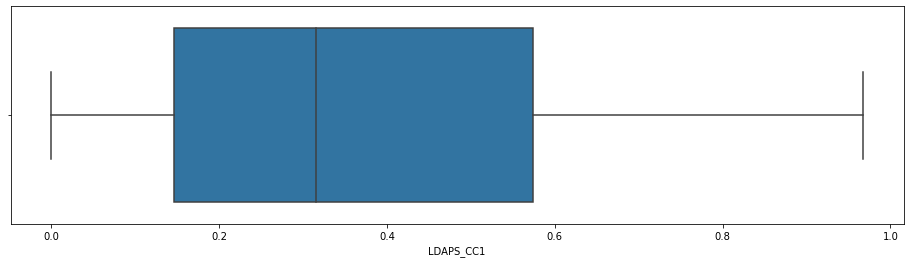

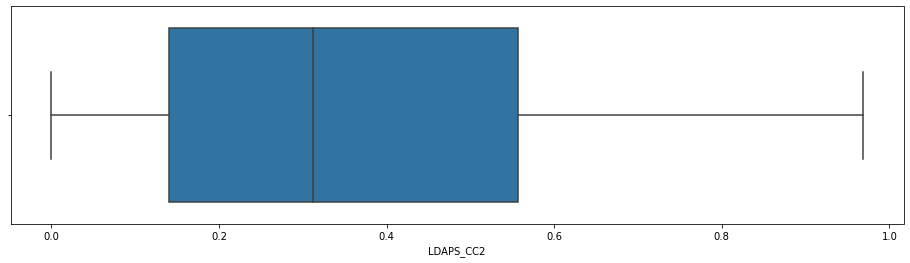

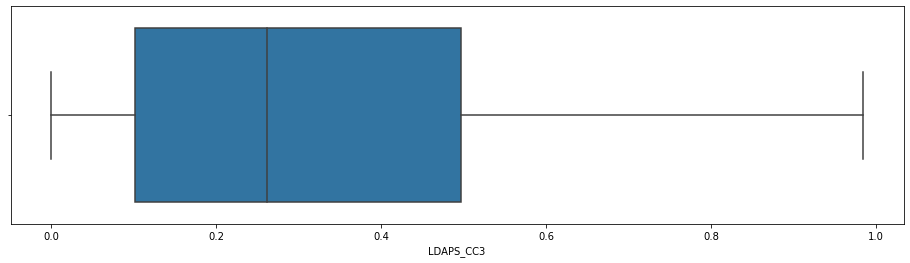

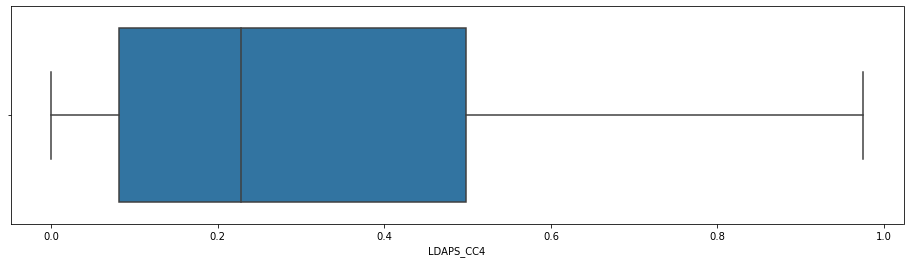

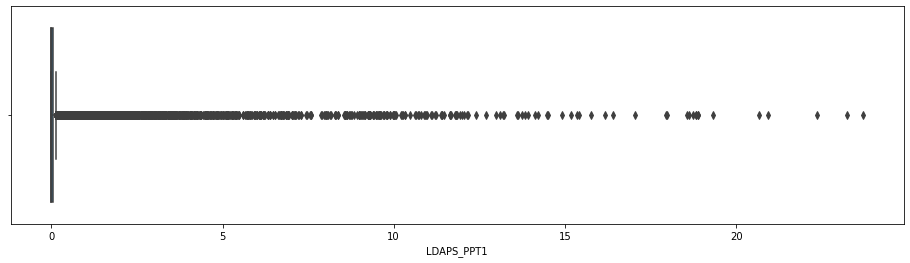

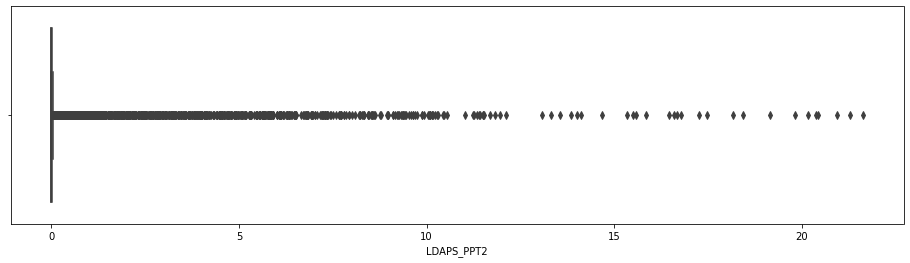

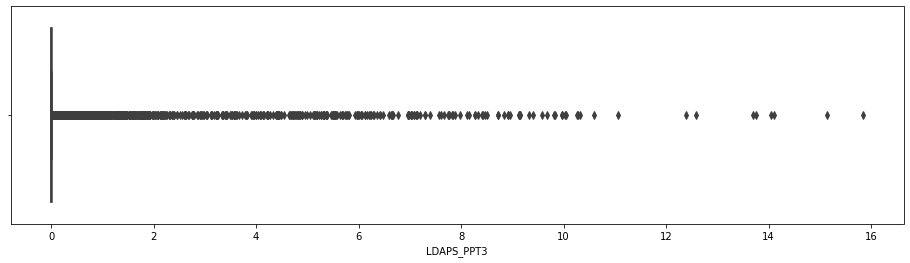

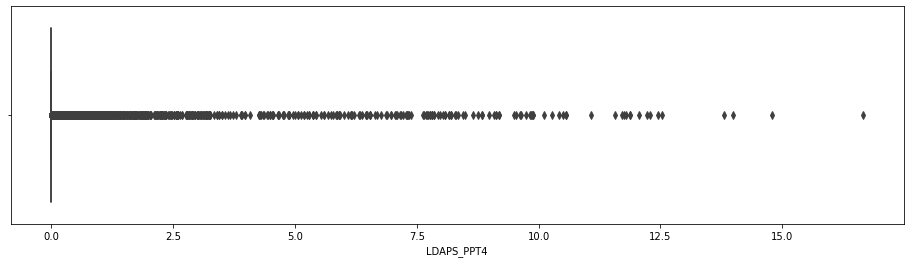

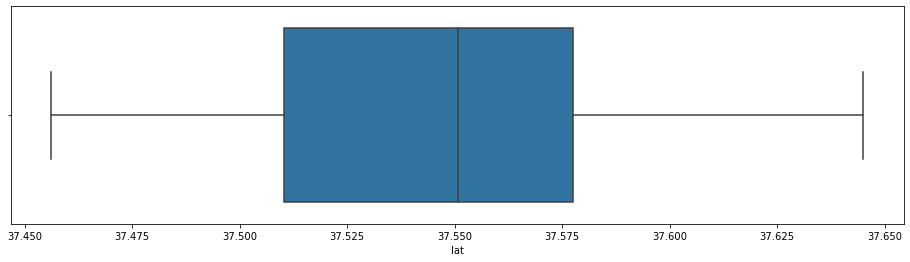

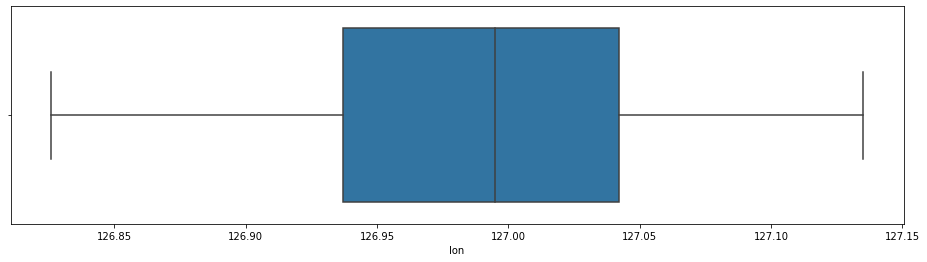

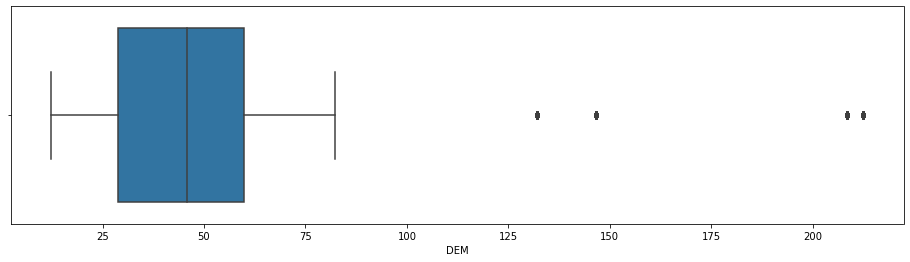

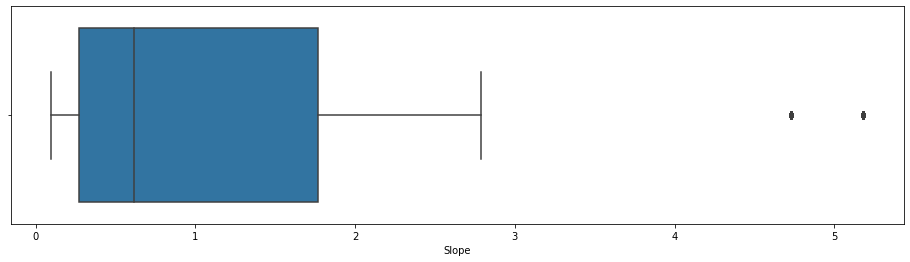

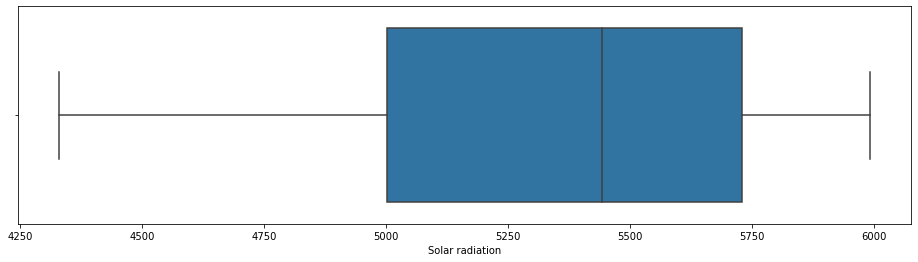

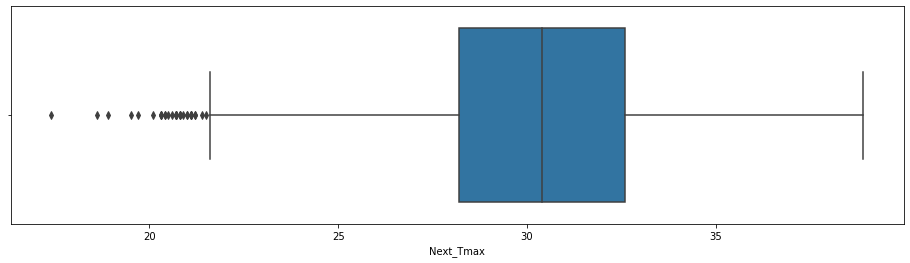

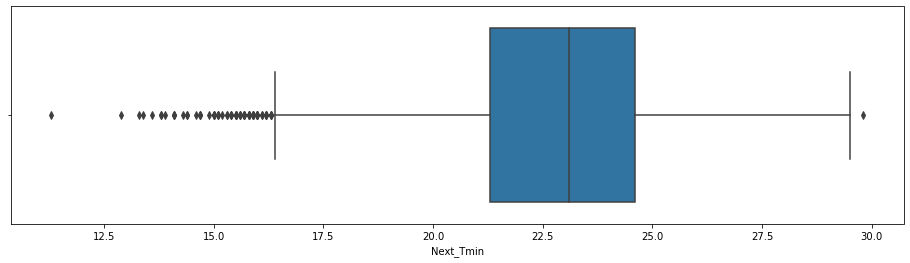

In [151]:
for col in num_var:
    fig_of_size(16,4)
    sns.boxplot(df_cleaned[col])


In [152]:
#  addressing the outliers using z score

z_scores = stats.zscore(df_cleaned[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

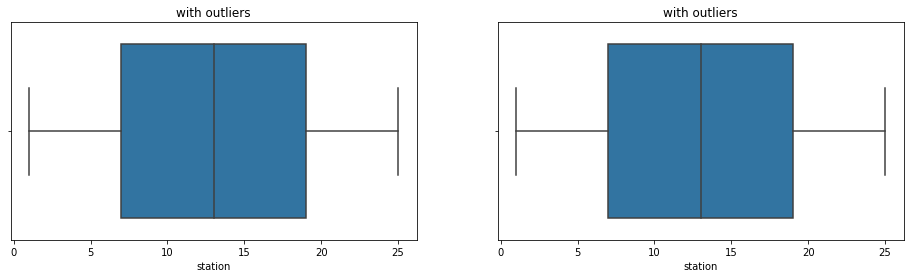

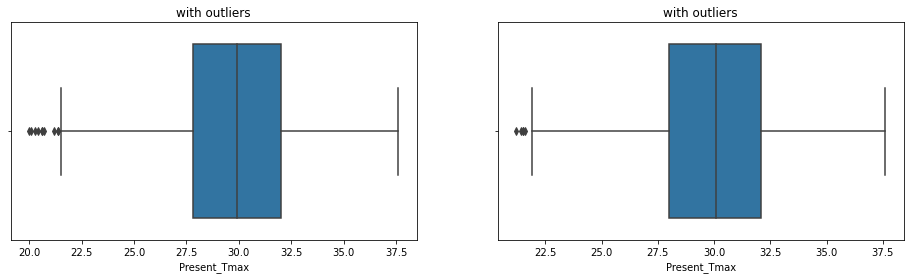

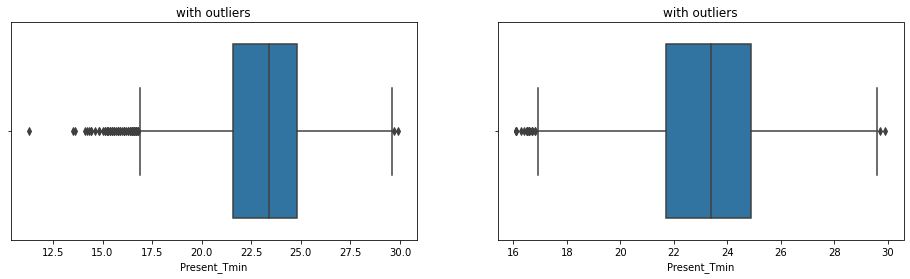

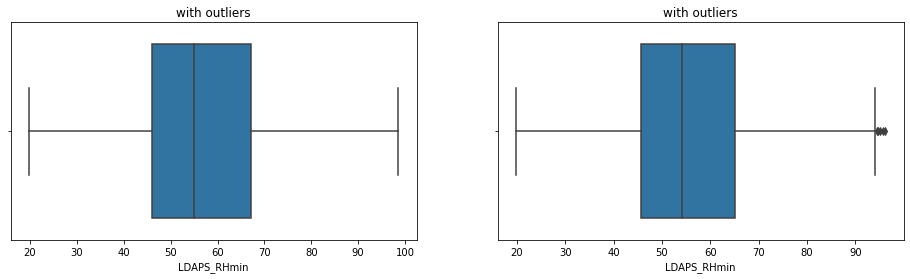

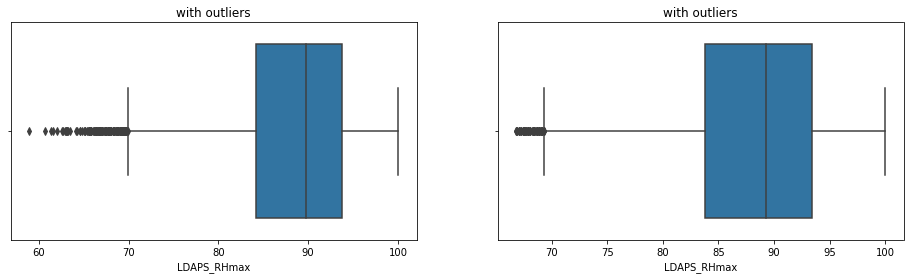

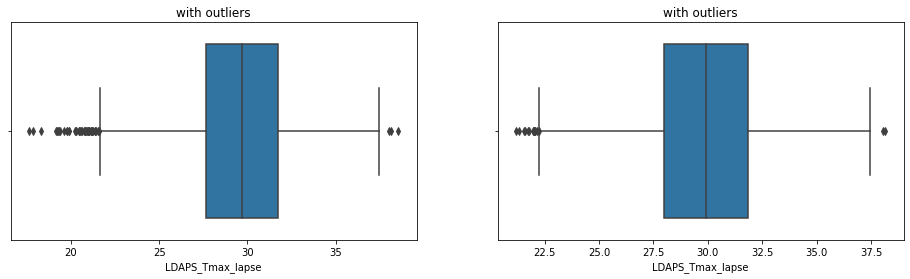

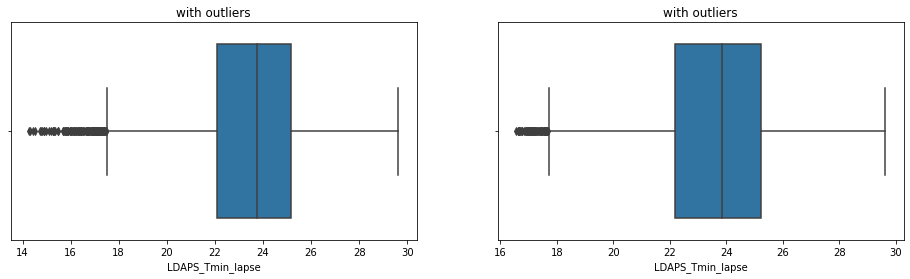

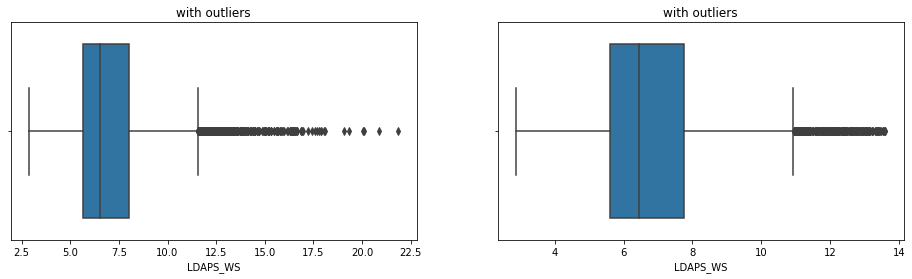

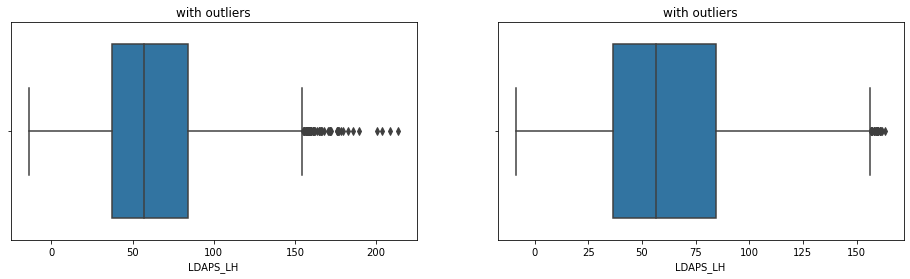

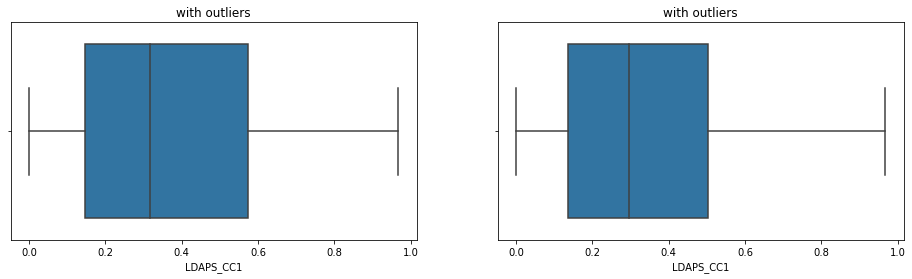

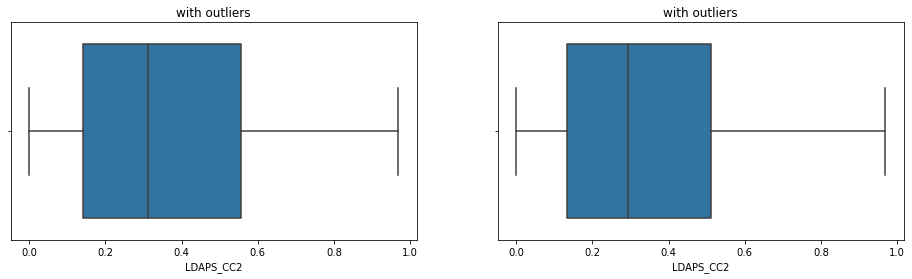

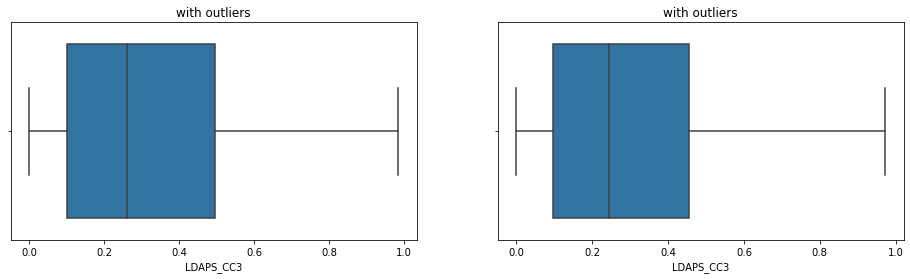

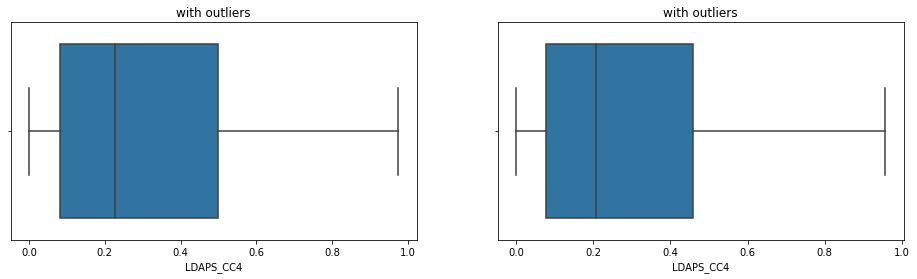

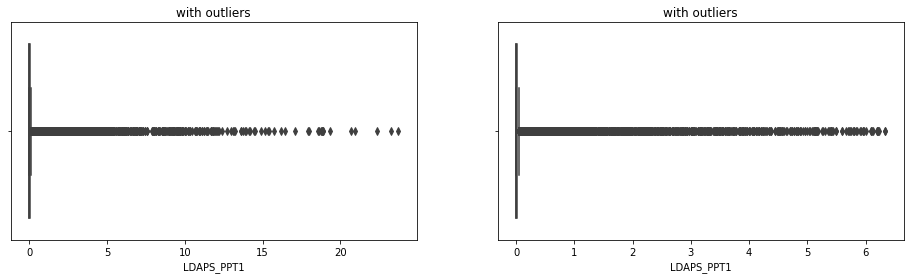

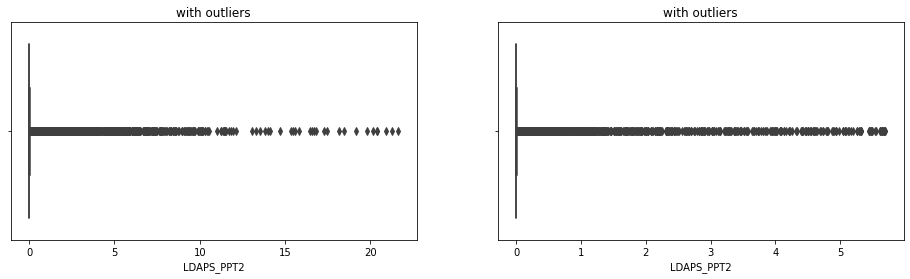

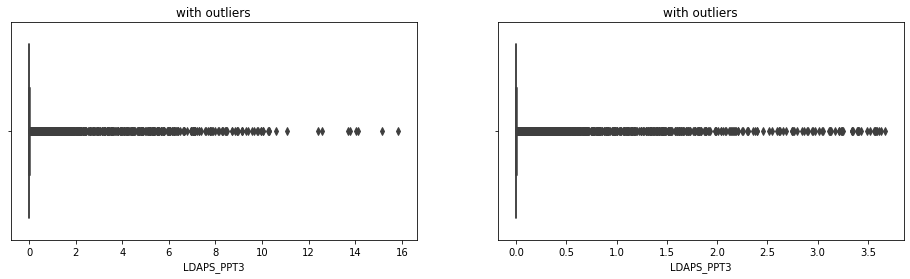

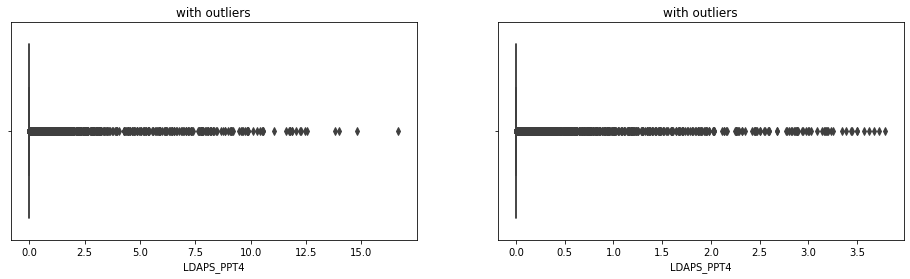

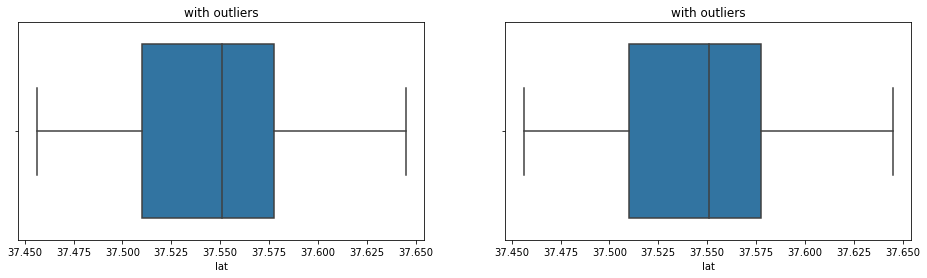

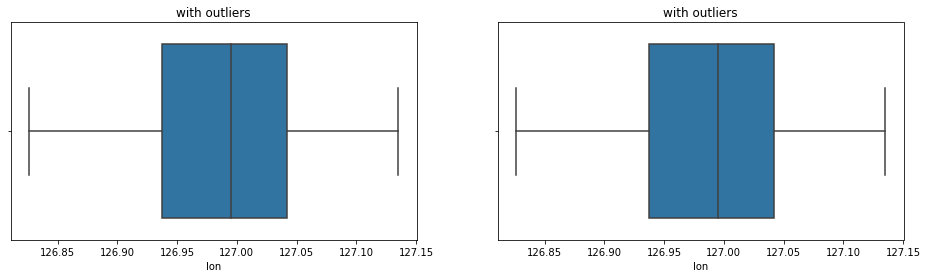

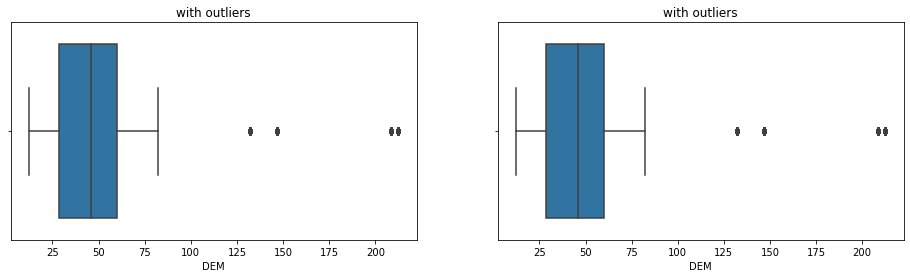

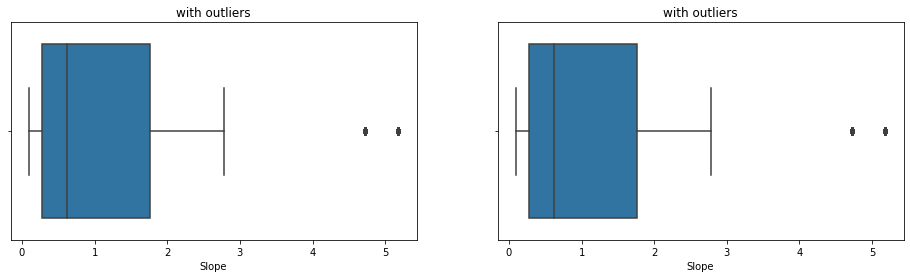

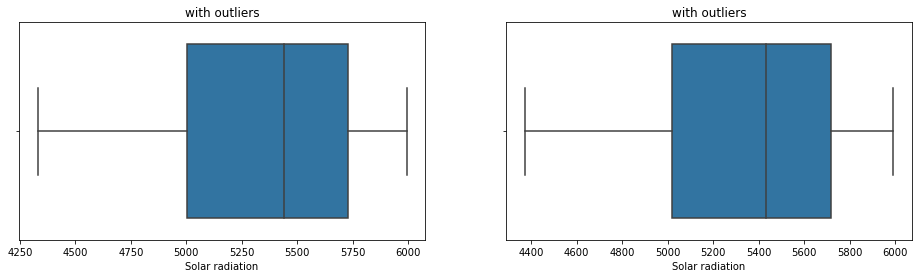

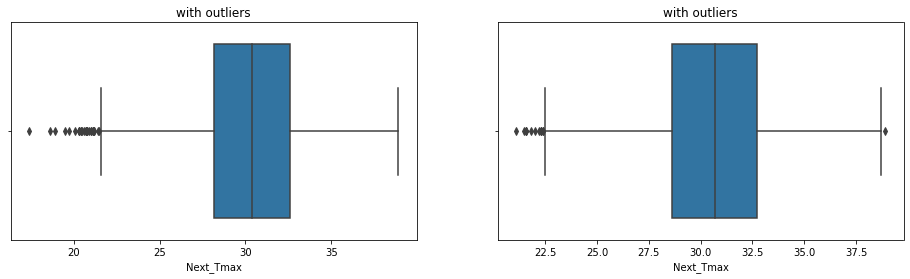

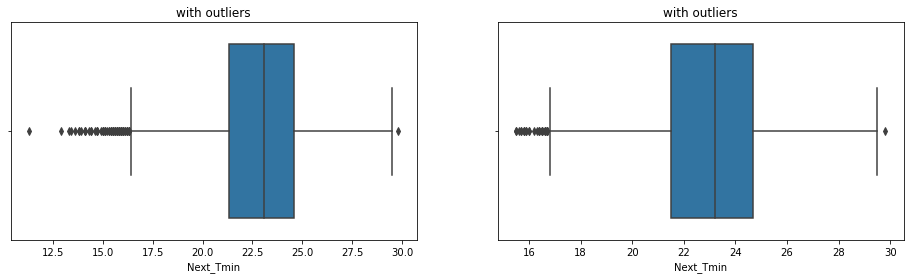

In [153]:
for col in num_var:
    fig = fig_of_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('with outliers')
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('with outliers')

# Skew of the features


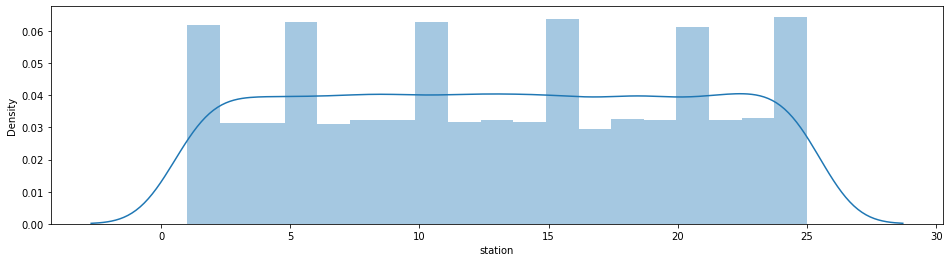

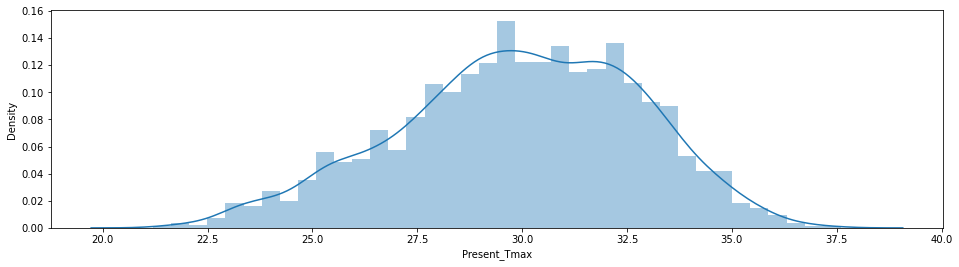

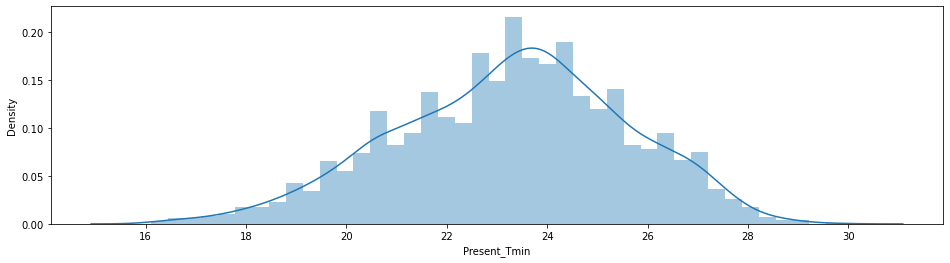

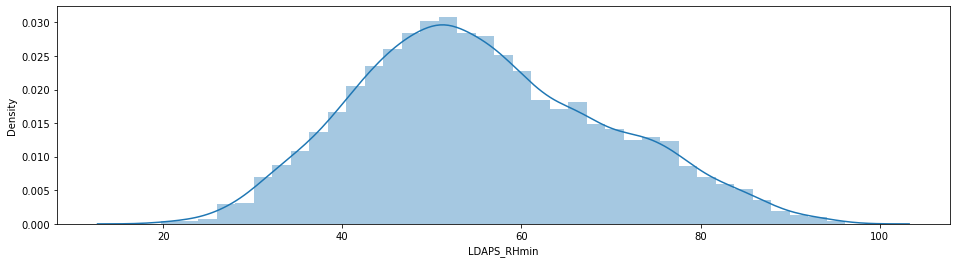

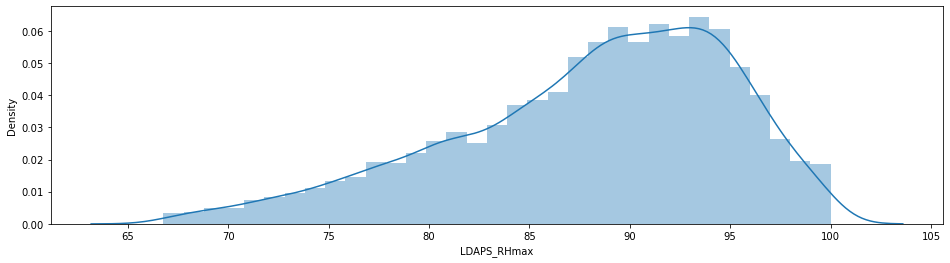

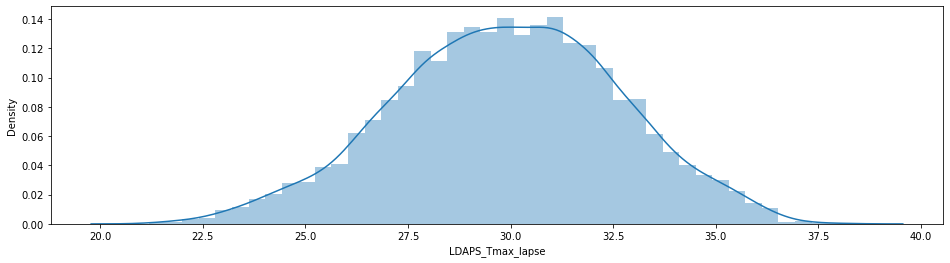

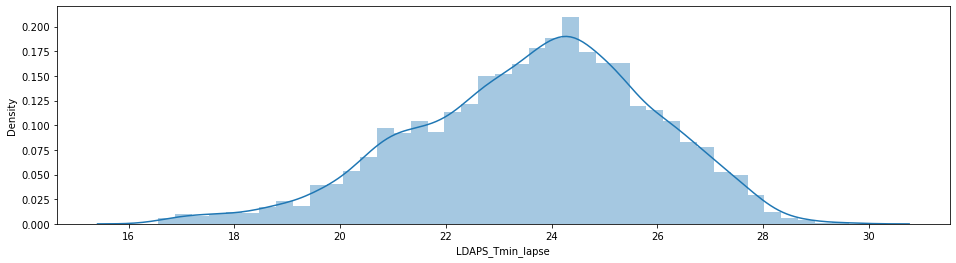

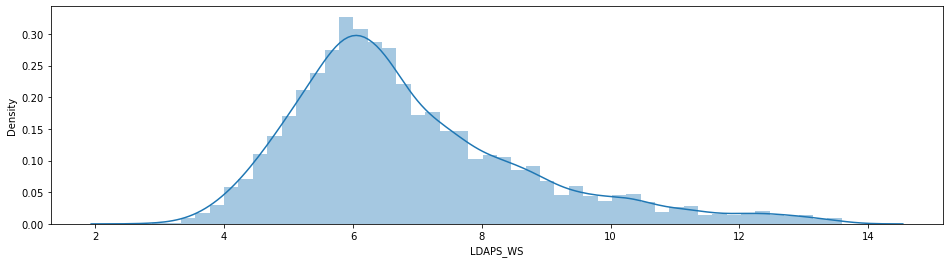

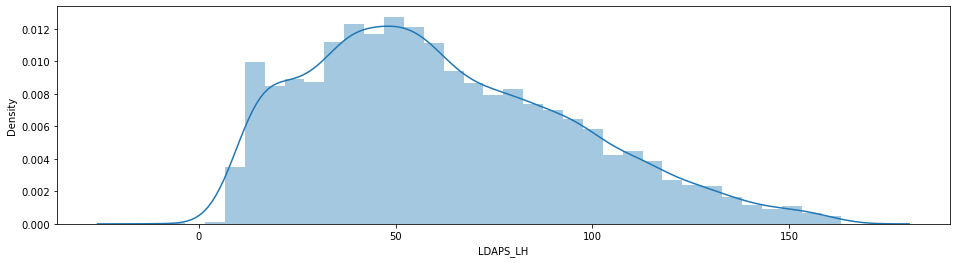

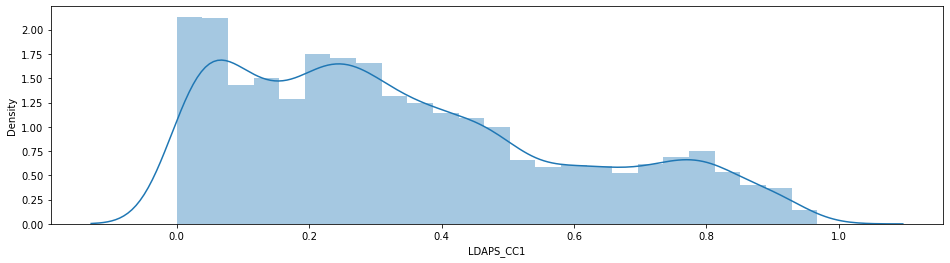

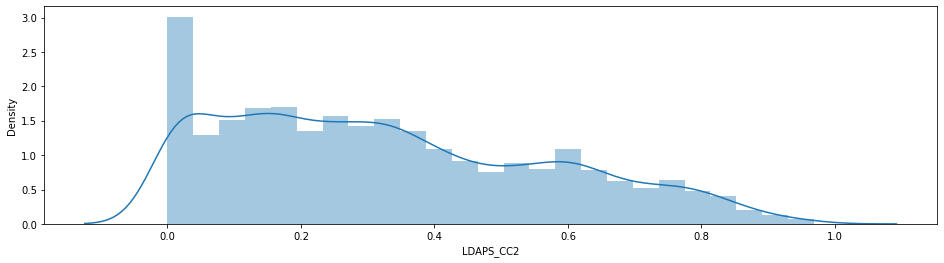

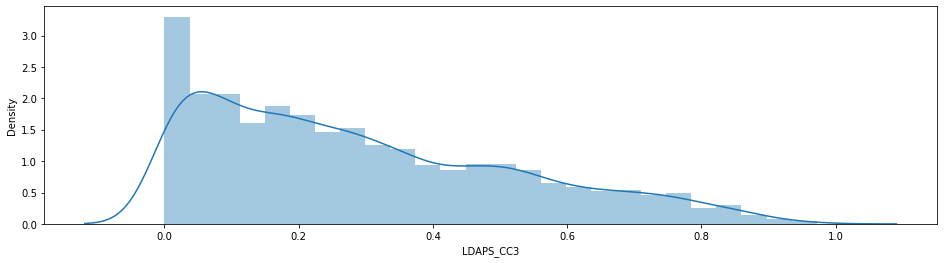

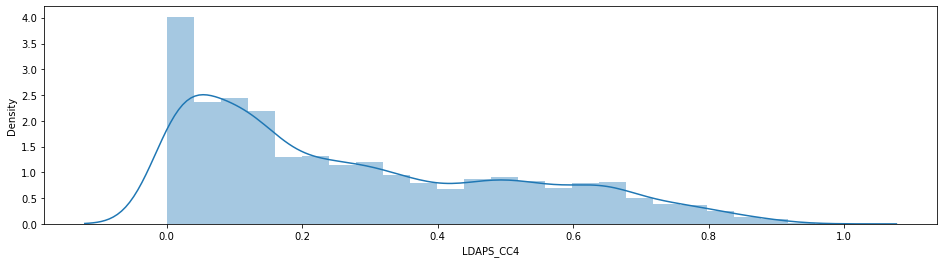

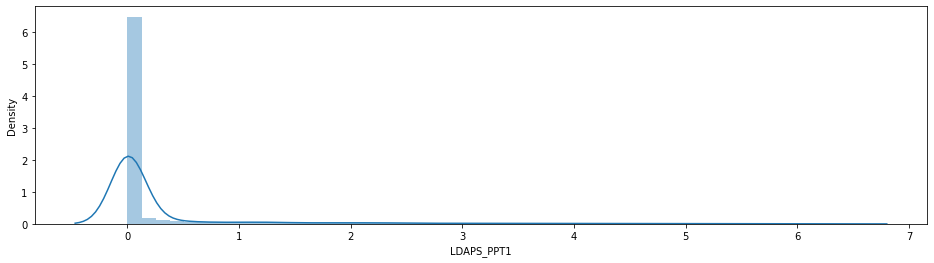

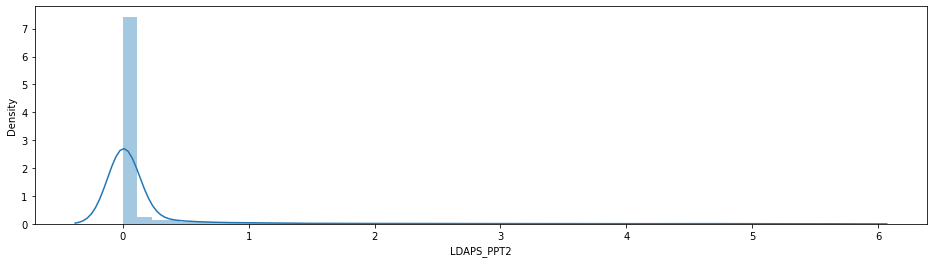

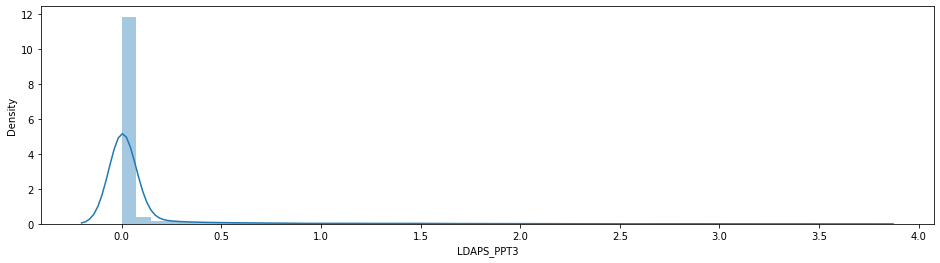

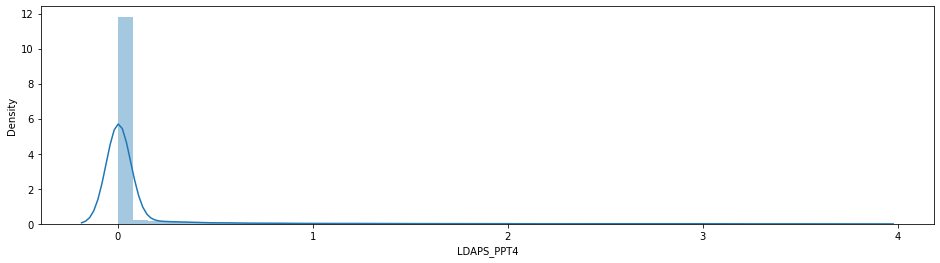

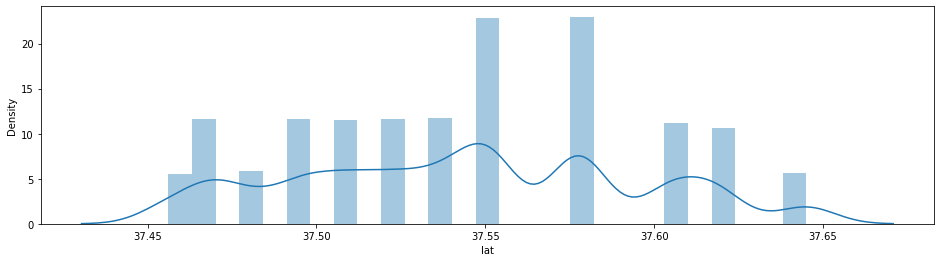

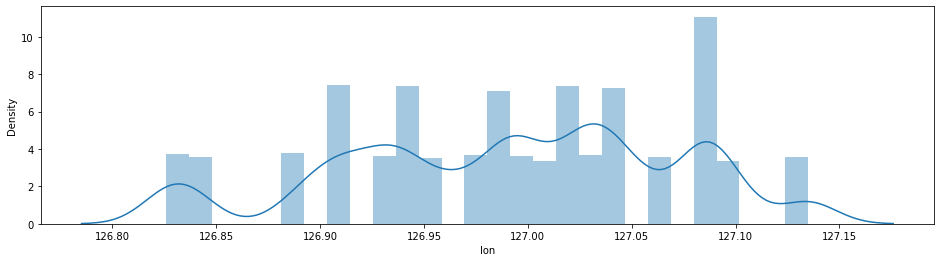

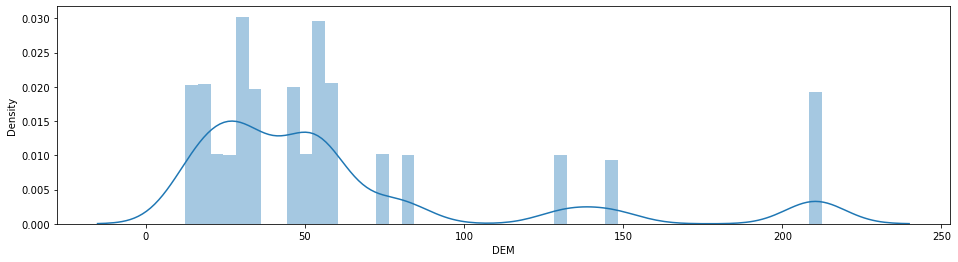

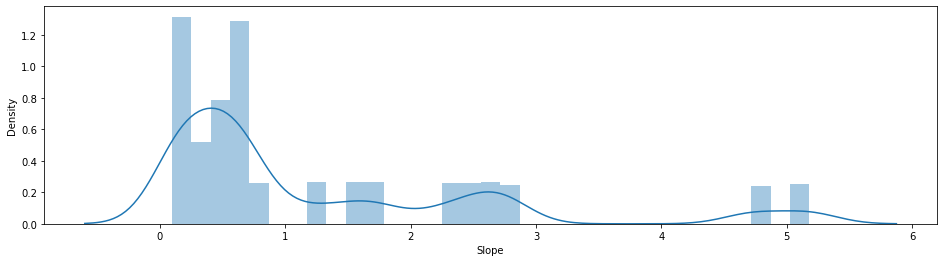

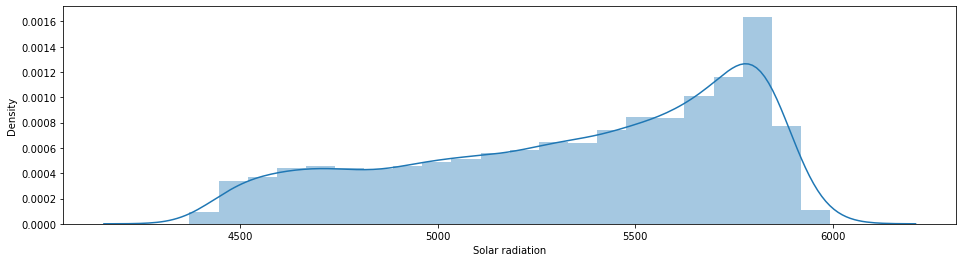

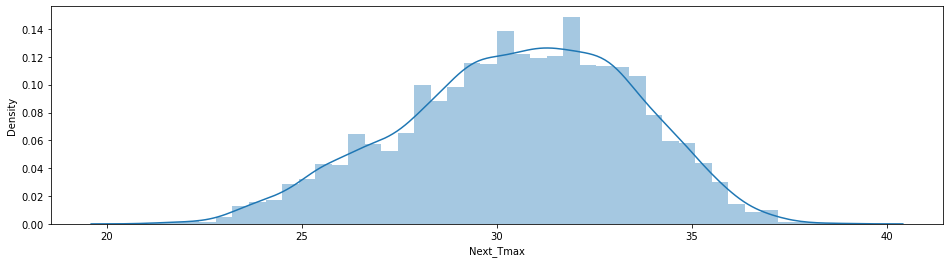

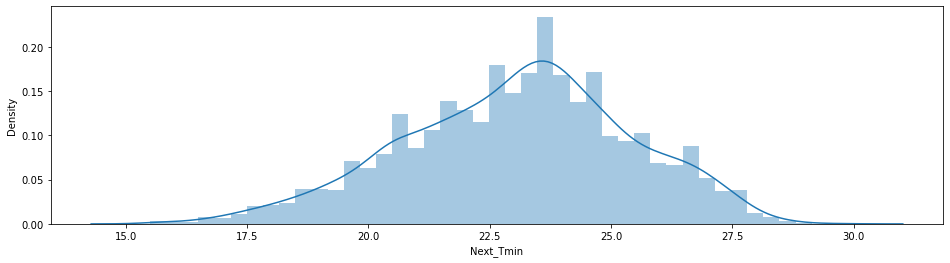

In [154]:
for col in num_var:
    fig_of_size(16,4)
    sns.distplot(df_cleaned[col])


In [155]:
df_cleaned.skew()


station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [156]:
df_cleaned.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# feature engineering the date feature.


In [157]:
# Converting Date OF Journey into Day, Date and Month of Journey

df_cleaned['Day'] = pd.to_datetime(df_cleaned.Date, format='%d-%m-%Y').dt.day
df_cleaned['Month'] = pd.to_datetime(df_cleaned.Date, format='%d-%m-%Y').dt.month
df_cleaned['year']= pd.to_datetime(df_cleaned.Date, format='%d-%m-%Y').dt.year

In [158]:
df_cleaned.drop(labels='Date', axis=1, inplace=True)
df_cleaned.drop(labels='Day', axis=1, inplace=True)

In [159]:
df_cleaned.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013


In [160]:
df_cleaned["Month"]=df_cleaned["Month"].replace(1.0,"Jan")
df_cleaned["Month"]=df_cleaned["Month"].replace(2.0,"Feb")
df_cleaned["Month"]=df_cleaned["Month"].replace(3.0,"Mar")
df_cleaned["Month"]=df_cleaned["Month"].replace(4.0,"Apr")
df_cleaned["Month"]=df_cleaned["Month"].replace(5.0,"May")
df_cleaned["Month"]=df_cleaned["Month"].replace(6.0,"Jun")
df_cleaned["Month"]=df_cleaned["Month"].replace(7.0,"July")
df_cleaned["Month"]=df_cleaned["Month"].replace(8.0,"Aug")
df_cleaned["Month"]=df_cleaned["Month"].replace(9.0,"Sep")
df_cleaned["Month"]=df_cleaned["Month"].replace(10.0,"Oct")
df_cleaned["Month"]=df_cleaned["Month"].replace(11.0,"Nov")
df_cleaned["Month"]=df_cleaned["Month"].replace(12.0,"Dec")

In [161]:
df_cleaned.year.value_counts()

2015    1435
2014    1391
2013    1309
2017    1304
2016    1300
Name: year, dtype: int64

In [162]:
df_cleaned.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,Jun,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,Jun,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,Jun,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,Jun,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,Jun,2013


lets get rid of redundant column station as well

In [163]:
df_cleaned.drop(labels='station', axis=1, inplace=True)


In [164]:
df_cleaned.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,Jun,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,Jun,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,Jun,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,Jun,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,Jun,2013


# multi analysis

(array([0, 1, 2]), [Text(0, 0, 'Jun'), Text(1, 0, 'July'), Text(2, 0, 'Aug')])

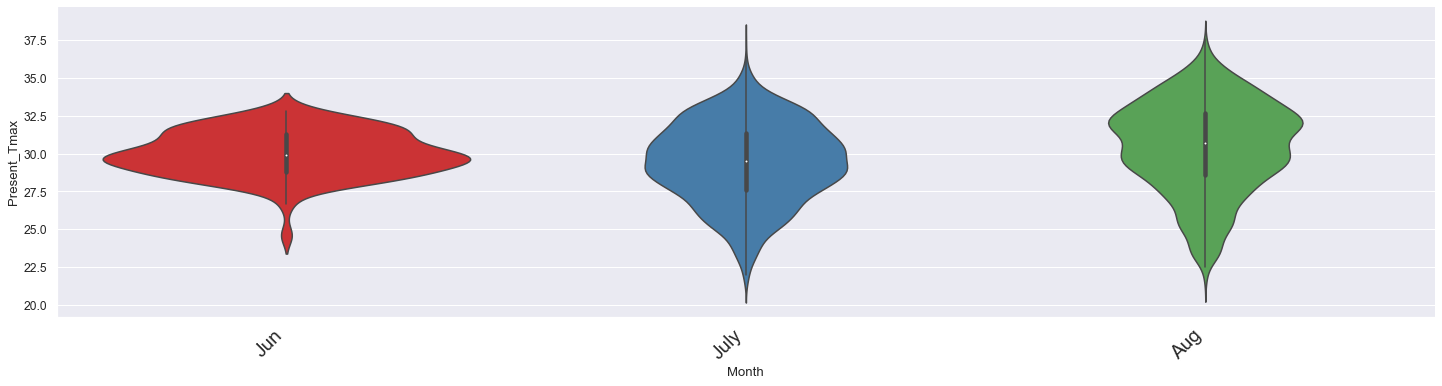

In [171]:
sns.set(font_scale=1.1)
sns.catplot(x='Month',y='Present_Tmax',kind='violin',data=df_cleaned,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2]), [Text(0, 0, 'Jun'), Text(1, 0, 'July'), Text(2, 0, 'Aug')])

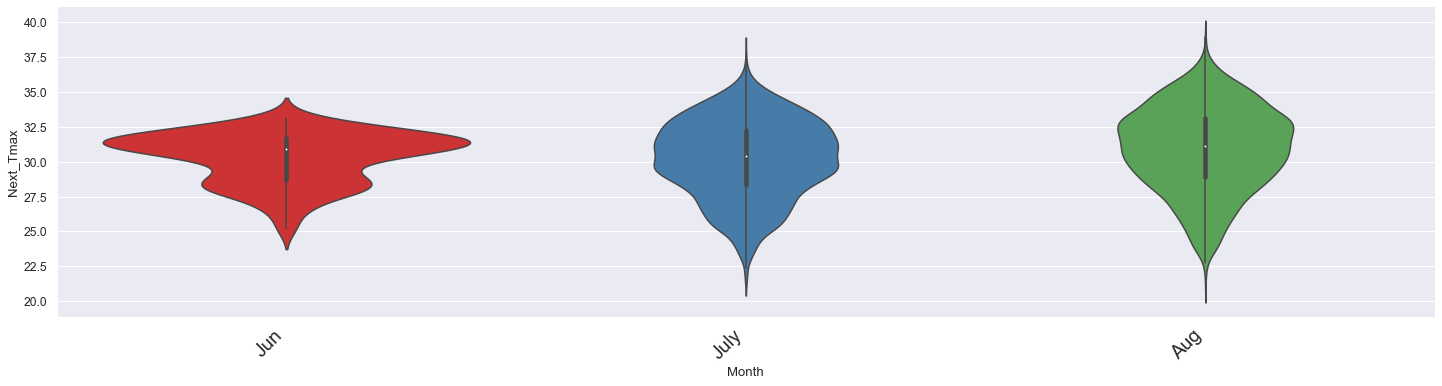

In [172]:
sns.set(font_scale=1.1)
sns.catplot(x='Month',y='Next_Tmax',kind='violin',data=df_cleaned,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2]), [Text(0, 0, 'Jun'), Text(1, 0, 'July'), Text(2, 0, 'Aug')])

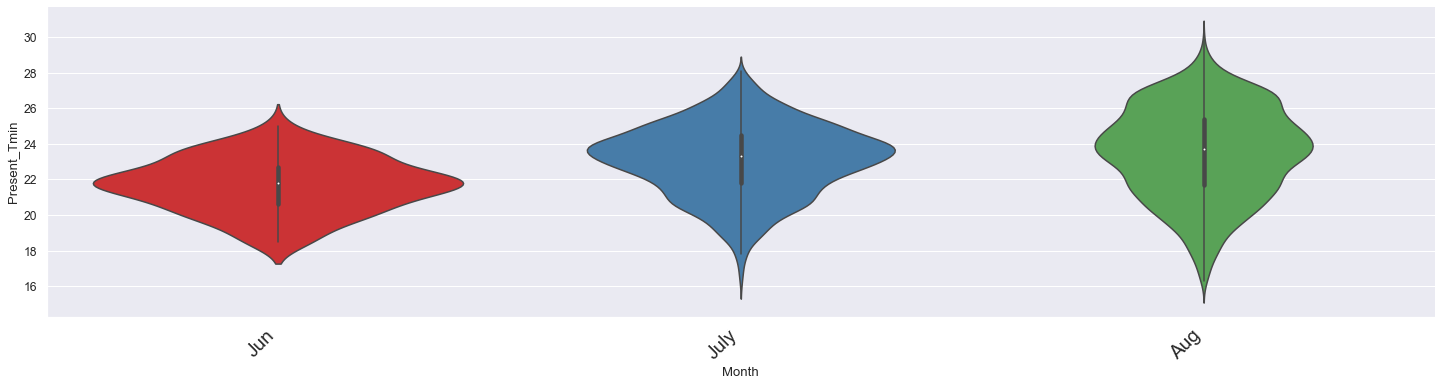

In [173]:
sns.set(font_scale=1.1)
sns.catplot(x='Month',y='Present_Tmin',kind='violin',data=df_cleaned,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


(array([0, 1, 2]), [Text(0, 0, 'Jun'), Text(1, 0, 'July'), Text(2, 0, 'Aug')])

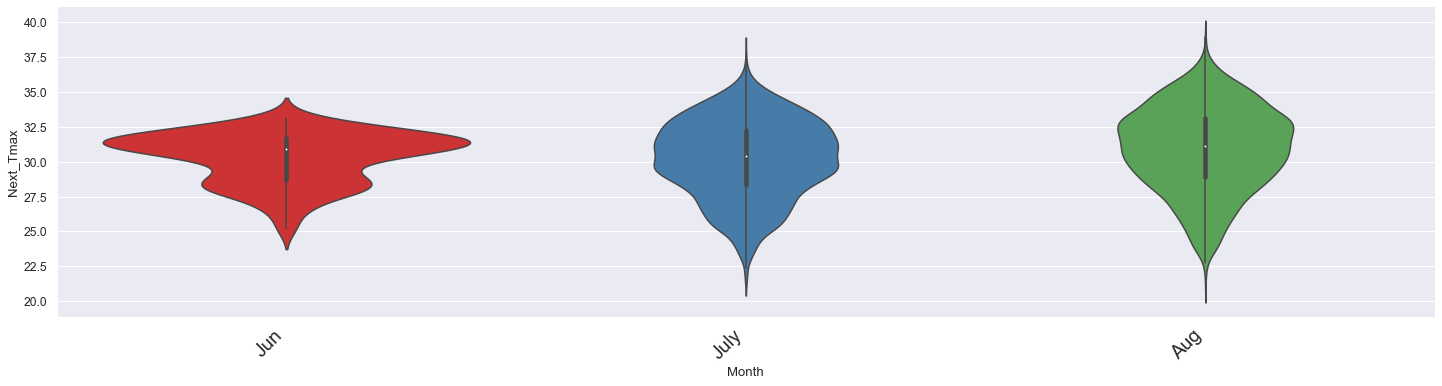

In [174]:
sns.set(font_scale=1.1)
sns.catplot(x='Month',y='Next_Tmax',kind='violin',data=df_cleaned,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


 we can see that the maximum temperature in august can go around 40 and least temperature in june is around 22 only

<AxesSubplot:xlabel='Month', ylabel='count'>

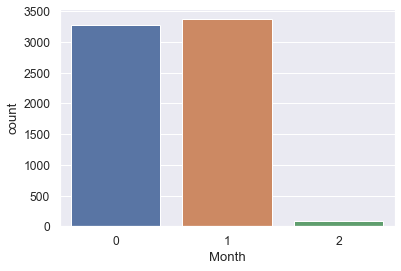

In [185]:
sns.countplot(df_cleaned.Month)

mostly its july and august dataset only

1
0
2


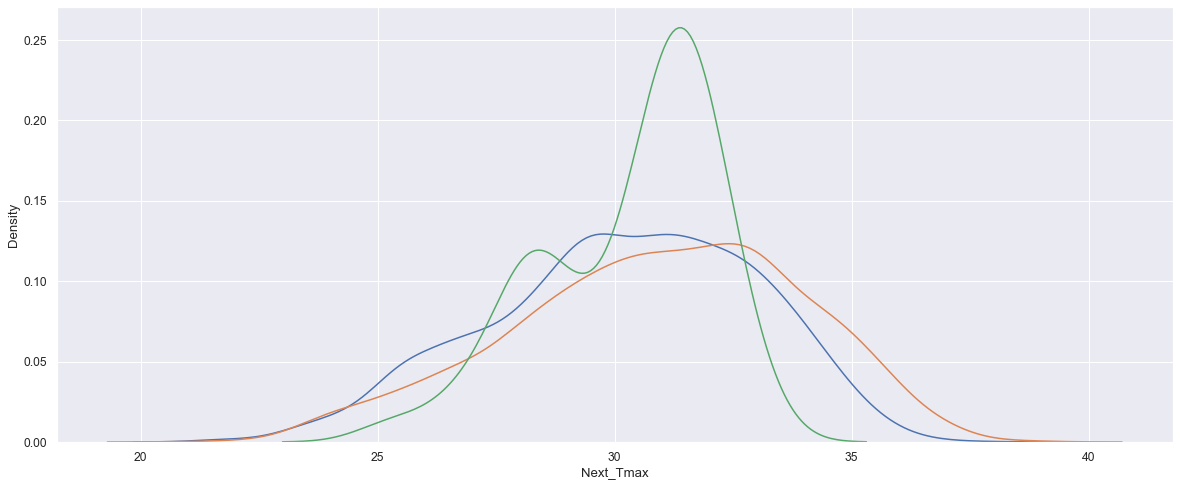

In [186]:
plt.figure(figsize=(20,8))
for Q in df_cleaned.Month.value_counts().index:
    print(Q)
    sns.kdeplot(df_cleaned[df_cleaned.Month == Q]['Next_Tmax'],label=Q)

1
0
2


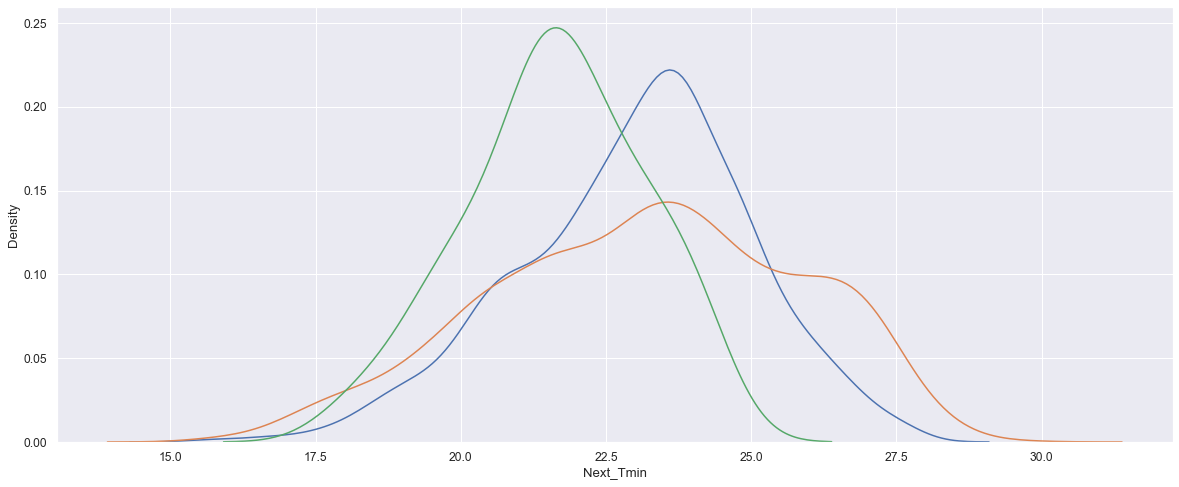

In [187]:
plt.figure(figsize=(20,8))
for Q in df_cleaned.Month.value_counts().index:
    print(Q)
    sns.kdeplot(df_cleaned[df_cleaned.Month == Q]['Next_Tmin'],label='yes')

1
0
2


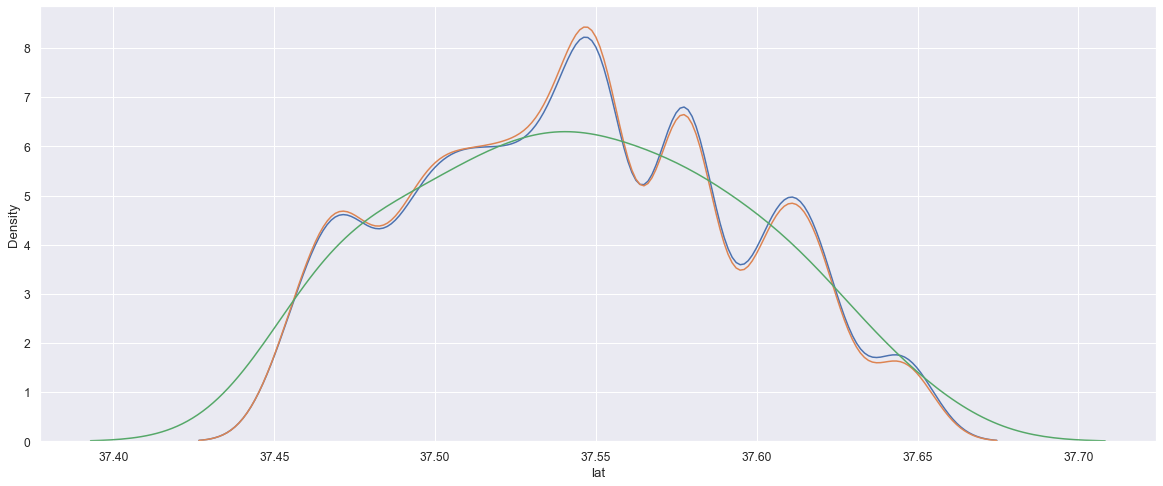

In [188]:
plt.figure(figsize=(20,8))
for Q in df_cleaned.Month.value_counts().index:
    print(Q)
    sns.kdeplot(df_cleaned[df_cleaned.Month == Q]['lat'],label=Q)

1
0
2


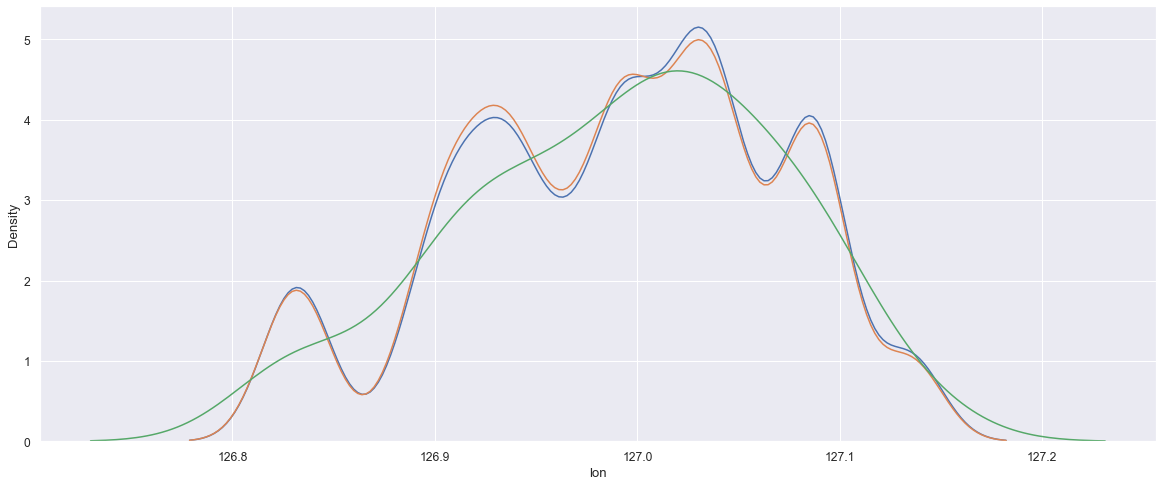

In [189]:
plt.figure(figsize=(20,8))
for Q in df_cleaned.Month.value_counts().index:
    print(Q)
    sns.kdeplot(df_cleaned[df_cleaned.Month == Q]['lon'],label=Q)

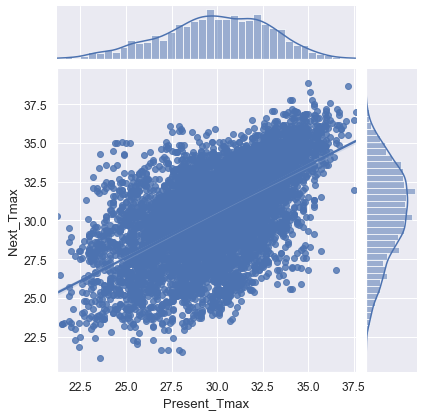

In [190]:
import scipy.stats as stats
dur = sns.jointplot(x='Present_Tmax',y='Next_Tmax',data=df_cleaned,kind = 'reg')
plt.show()

from the graph it is shown that the maximum temperature from present and next day is far different from occasion 

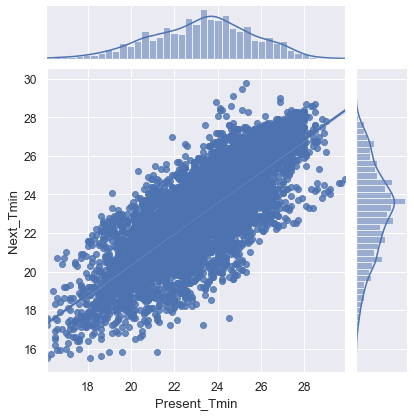

In [191]:
import scipy.stats as stats
dur = sns.jointplot(x='Present_Tmin',y='Next_Tmin',data=df_cleaned,kind = 'reg')
plt.show()

from the graph it is shown that the minimum temperature from present and next day is far different from occasion 

In [192]:
df_cleaned.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2,2013


# encoding the month column

In [193]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
df_cleaned['Month']= le.fit_transform(df_cleaned['Month'])

In [195]:
df_cleaned.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2,2013


# X and y split


In [196]:
X = df_cleaned.drop(['Next_Tmax','Next_Tmin'],1)
y = df_cleaned[['Next_Tmax','Next_Tmin']]

In [197]:
X.shape,y.shape


((6739, 23), (6739, 2))

# train test split


In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [199]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((4717, 23), (4717, 2), (2022, 23), (2022, 2))

# Standard Scaling

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [206]:
to_scale = X_train.columns



In [207]:
to_scale

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Month', 'year'],
      dtype='object')

In [208]:
ct = ColumnTransformer(transformers=[('sc',StandardScaler(),to_scale)],remainder='passthrough')


In [210]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [211]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.116153,1.602401,0.561570,-0.375556,0.553587,1.500397,-0.456486,-0.639871,0.899118,0.368587,...,-0.255985,0.109620,-0.236856,-0.416844,-0.259199,-0.776696,-0.720557,0.179365,0.907583,0.724985
1,1.255748,1.342859,-0.216092,-1.100112,1.044039,1.731362,0.201466,-1.111891,-0.355682,0.076269,...,-0.211578,-0.256363,-0.236856,-0.416844,-0.259199,-0.776696,-0.720557,-0.743227,-0.989213,-1.435770
2,1.220849,0.867031,-0.324731,0.211025,-1.621398,-0.922243,0.956508,1.536388,2.031446,1.179701,...,-0.094856,-0.256363,-0.236856,-1.228326,0.422783,-0.093953,-0.010362,-1.773993,-0.989213,0.724985
3,-0.698581,0.477717,0.823828,-0.261122,0.427632,0.897333,-0.612279,-1.484352,-0.177923,0.413927,...,-0.280052,-0.256363,-0.124136,0.124144,-0.675966,-0.582915,-0.288595,1.116177,0.907583,1.445237
4,-0.279797,0.953545,-0.098436,-0.102270,0.859680,0.147109,-0.307621,-1.455175,-0.629230,-0.589617,...,-0.280052,-0.256363,-0.236856,0.663128,0.852179,-0.522524,-0.724404,0.841740,0.907583,1.445237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,0.697368,0.347946,0.887974,-0.122844,-1.104334,0.055708,-1.477164,-0.553654,-0.047003,1.609697,...,0.546537,-0.256363,-0.236856,-1.228326,0.422783,-0.093953,-0.010362,-0.838591,-0.989213,0.004733
4713,1.604735,1.732173,-0.527752,-1.718407,1.309912,1.439656,-0.670651,0.927692,-1.215177,-0.891674,...,-0.280052,-0.252206,-0.236856,-0.146350,-1.256914,-0.850726,-0.806298,-1.073312,-0.989213,0.724985
4714,0.976558,2.034972,-0.329703,-1.482948,1.104845,1.606080,-0.531273,-0.017763,0.952883,-0.101186,...,-0.280052,-0.256363,-0.236856,-1.498820,-1.016957,-0.166687,0.234951,-1.240254,-0.989213,0.724985
4715,-0.070404,-1.901423,0.152244,0.270321,-1.973047,-2.285210,0.724948,1.143692,1.295359,0.544532,...,-0.280052,-0.256363,2.718972,-1.228326,0.422783,-0.093953,-0.010362,-1.959464,-0.989213,0.724985


# Building the model

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [213]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error

In [214]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    print('R2_score',r2_score(y_test,y_preds))
    print('MSE',mean_squared_error(y_test,y_preds))

In [215]:
model = LinearRegression()


In [216]:
model.fit(X_train,y_train)


LinearRegression()

In [217]:
y_preds = pd.DataFrame(model.predict(X_test),columns=['Max','Min'])


In [218]:
y_preds.iloc[:,0]


0       30.474999
1       28.570164
2       30.528497
3       33.386724
4       31.616635
          ...    
2017    24.447191
2018    32.445939
2019    29.360799
2020    26.554316
2021    26.229461
Name: Max, Length: 2022, dtype: float64

In [219]:
model.score(X_test,y_test)


0.7795293763122983

In [220]:
train_n_ret_scores(LinearRegression())


R2_score 0.7795293763122983
MSE 1.5918546129526474


In [221]:
model = KNeighborsRegressor()


In [222]:
model.fit(X_train,y_train)


KNeighborsRegressor()

In [223]:
train_n_ret_scores(KNeighborsRegressor())


R2_score 0.8620579350073031
MSE 0.978432245301682


In [224]:
model = DecisionTreeRegressor()


In [225]:
train_n_ret_scores(DecisionTreeRegressor())

R2_score 0.7088656640690798
MSE 2.0630069238377864


In [226]:
model = RandomForestRegressor()


In [227]:
train_n_ret_scores(RandomForestRegressor())


R2_score 0.8834326656499524
MSE 0.8221534112265085


# HyperParameter Tunning

In [228]:
from sklearn.model_selection import GridSearchCV


In [229]:
RandomForestRegressor( )


RandomForestRegressor()

In [230]:
param_dict = {
 'max_depth': [10, 20, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100,200, 400]}

In [231]:
gs_model = GridSearchCV(RandomForestRegressor(),param_grid=param_dict,verbose=3)


In [232]:
gs_model.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.861, total=   5.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.865, total=   6.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.9s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.857, total=   4.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.871, total=   4.8s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.863, total=   4.7s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.860, total=   9.8s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.866, total=   9.7s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 58.4min finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400]},
             verbose=3)

In [233]:
gs_model.best_score_  # this is the cross validated hypter tuned score


0.8790571525926019

In [234]:
best_model = gs_model


In [235]:
y_preds = best_model.predict(X_test)


In [236]:
y_preds


array([[29.697  , 23.295  ],
       [29.11025, 21.0965 ],
       [32.28925, 26.461  ],
       ...,
       [28.24925, 20.8555 ],
       [26.02025, 22.053  ],
       [25.0545 , 20.9495 ]])

# Saving the model.


In [238]:
import joblib
joblib.dump(best_model,'temperature.pkl')


['temperature.pkl']

# summary

in above model it is summaried that relation analysis between features and target with best visualisation

also best model has been predicted with best hyperparameter tuning